Time Series Analysis and Forecasting 

Forecasting is an important operation planning for most of the real-life problems. 

In this data set, we forecast the Portland Oregon average monthly bus ridership.

Trend


Level


Seasonal


Noise

In [127]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
#print(os.listdir("../input"))

In [68]:
# Importing the data set
df = pd.read_csv("portland-oregon-average-monthly-.csv")

In [69]:
# Data Preprocessing

In [70]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [71]:
df.describe()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
count,115,115
unique,115,112
top,1965-08,1417
freq,1,2


In [72]:
df.dtypes

Month                                                                                         object
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114    object
dtype: object

In [73]:
df.columns = ["month", "average_monthly_ridership"]

In [74]:
df['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [75]:
# removed the anamolous row 
df = df.drop(df.index[df['average_monthly_ridership'] == ' n=114'])

In [76]:
df['average_monthly_ridership'] = df['average_monthly_ridership'].astype(np.int32)

In [77]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')

In [78]:
df.dtypes

month                        datetime64[ns]
average_monthly_ridership             int32
dtype: object

In [79]:
df

,month,average_monthly_ridership
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
5,1960-06-01,622
6,1960-07-01,617
7,1960-08-01,613
8,1960-09-01,661
9,1960-10-01,695


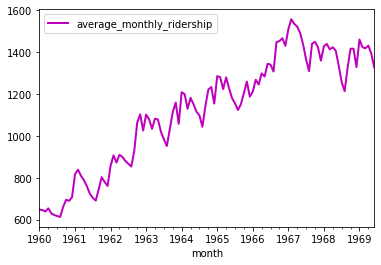

In [28]:
df.plot.line(x = 'month', y = 'average_monthly_ridership', linewidth=2, color='m')
plt.show()

Plot Variation on monthly basis

In [80]:
variation_monthly = df

In [85]:
# extracting month
m = df['month']

In [86]:
# yyyy-mm data-type 
month_m= pd.DatetimeIndex(m)

In [87]:
# assign month part of that data to ```month``` variable
month = pd.Series(month_m.month)

In [90]:
# dropping month from variation_monthly to join new one
variation_monthly = variation_monthly.drop(['month'], axis=1)

In [91]:
# join months 
variation_monthly = variation_monthly.join(month)

In [93]:
variation_monthly.head()

,average_monthly_ridership,month
0,648,1
1,646,2
2,639,3
3,654,4
4,630,5


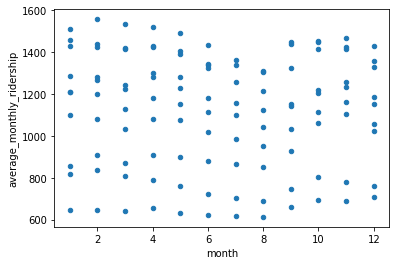

In [118]:
# Plotting scatter plot for each month
variation_monthly.plot.scatter(x = 'month', y = 'average_monthly_ridership')
plt.show()

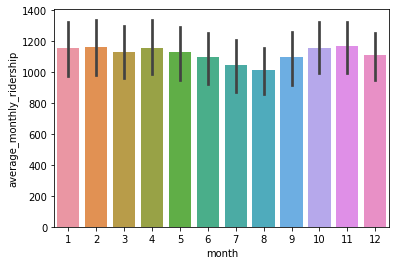

In [119]:
# Plotting bar plot for each month
sns.barplot(x = 'month', y = 'average_monthly_ridership', data = variation_monthly )
plt.show()

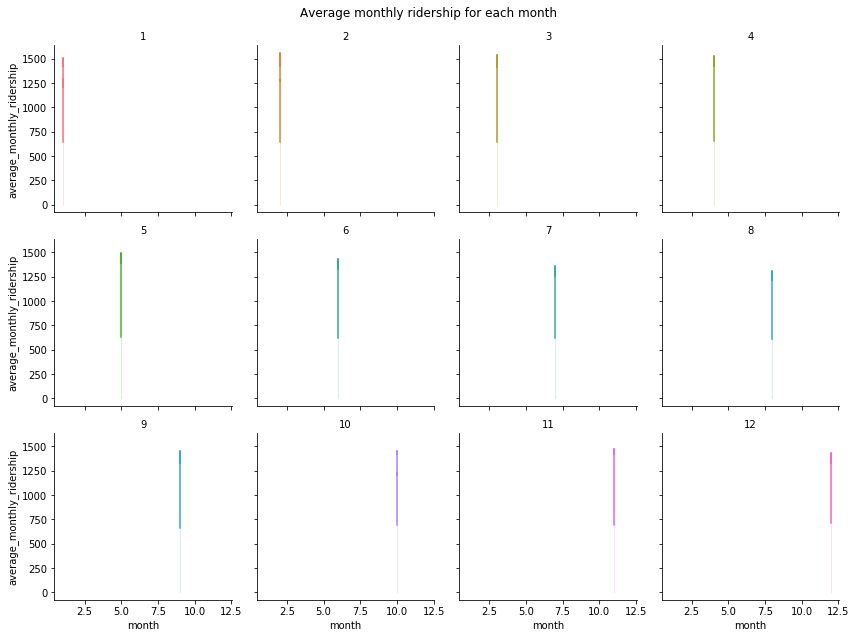

In [129]:
# Create a grid : initialize it
g = sns.FacetGrid(variation_monthly, col='month', hue='month', col_wrap=4, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'month', 'average_monthly_ridership')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'month', 'average_monthly_ridership', alpha=0.2).set_titles("{col_name} month")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Average monthly ridership for each month')
 
plt.show()


# Trend Analysis

In [97]:
rider = df[['average_monthly_ridership']]

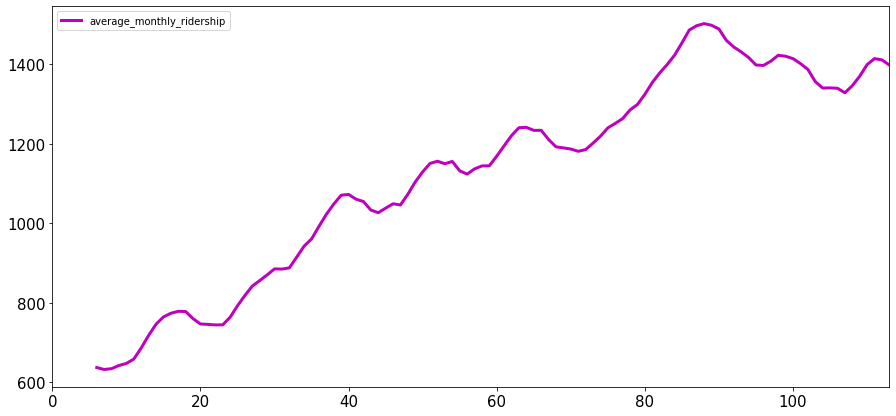

In [114]:
rider.rolling(7).mean().plot(figsize=(15,7), linewidth=3, fontsize=15, color='m')
plt.show()

# Seasonability Analysis

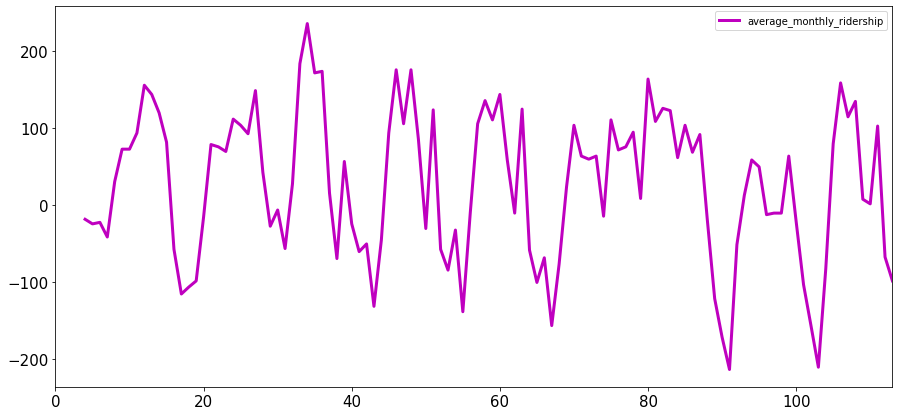

In [111]:
rider.diff(periods=4).plot(figsize=(15,7), linewidth=3, fontsize=15, color='m')
plt.show()

# Periodicity and Autocorrelation

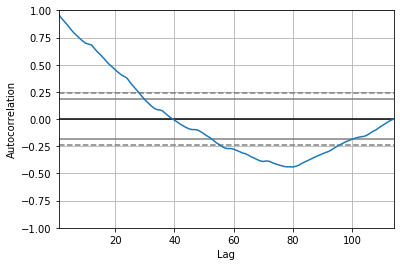

In [122]:
pd.plotting.autocorrelation_plot(df['average_monthly_ridership'])
plt.show()

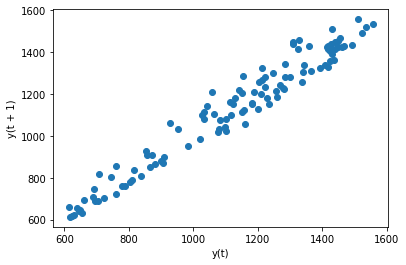

In [54]:
pd.plotting.lag_plot(df['average_monthly_ridership'])
plt.show()

In [55]:
df = df.set_index('month')

In [115]:
df.head()

,month,average_monthly_ridership
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


# Applying Seasonal ARIMA model 
We can forecast a time series using the series past values, 
that is, its own lags and the lagged forecast errors.

Thus it can be used for forecast of the future values.

In [116]:

mod = sm.tsa.SARIMAX(df['average_monthly_ridership'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:          average_monthly_ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -501.340
Date:                            Tue, 24 Dec 2019   AIC                           1008.680
Time:                                    18:46:50   BIC                           1016.526
Sample:                                         0   HQIC                          1011.856
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.9990     42.365   

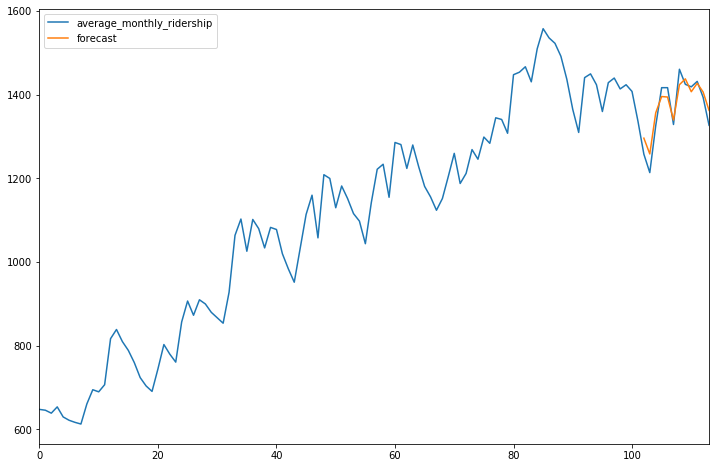

In [117]:
df['forecast'] = results.predict(start = 102, end= 120, dynamic= True)  
df[['average_monthly_ridership', 'forecast']].plot(figsize=(12, 8))
plt.show()

To generate future forecasts

In [61]:
def forcasting_future_months(df, no_of_months):
    df_perdict = df.reset_index()
    mon = df_perdict['month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months -1:]
    df_perdict = df_perdict.set_index('month')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
    df_perdict[['average_monthly_ridership', 'forecast']].iloc[-no_of_months - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_months:]

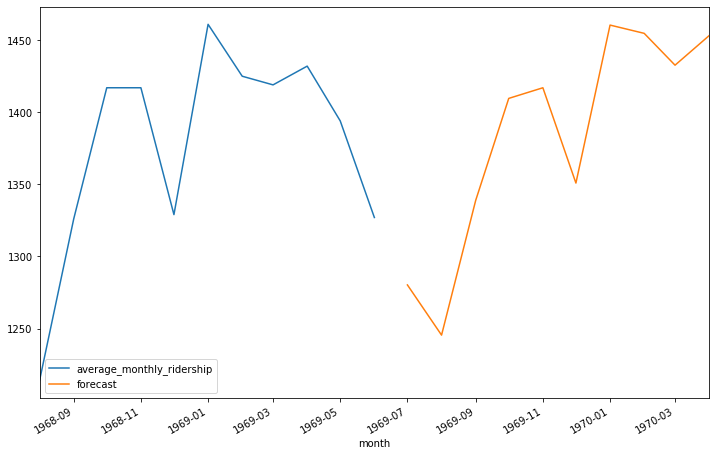

In [62]:
predicted = forcasting_future_months(df,10)

In [63]:
df.tail()

,average_monthly_ridership,forecast
month,,
1969-02-01,1425,1438.088824
1969-03-01,1419,1407.274324
1969-04-01,1432,1427.488426
1969-05-01,1394,1406.611424
1969-06-01,1327,1362.727769
